## 1. Import libraries

In [21]:
!pip install pyvi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pyvi import ViTokenizer

## 2. Read data

In [2]:
# Đọc dữ liệu từ file json
data = pd.read_json("data\data_coment_tiki.json")
data.head()

,content,rating
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [3]:
# Đổi nhãn
data.rename(columns={"content":"text","rating":"star"}, inplace=True)
data.head()

,text,star
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16115 entries, 0 to 16114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16115 non-null  object
 1   star    16115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 188.9+ KB


=> Dữ liệu có 16115 phần tử và không có phần tử nào rỗng

## 3. Exploratory Data Analysis (EDA)

### Class distribution (Sự phân bố các lớp)

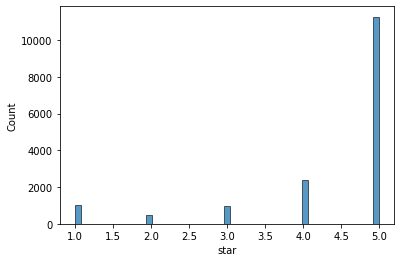

In [5]:
sns.histplot(data=data['star']);

### Do dữ liệu bị mất cân bằng nên ta xóa ngẫu nhiên 10000 mẫu 5 sao, và 1000 mẫu 4 sao

In [6]:
np.random.seed(10)
remove_n = 10000
drop_indices = np.random.choice(data[data['star'] == 5].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [7]:
np.random.seed(10)
remove_n = 1000
drop_indices = np.random.choice(data[data['star'] == 4].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [8]:
len(data)

5115

### Sự phân bố các lớp sau khi cân bằng dữ liệu

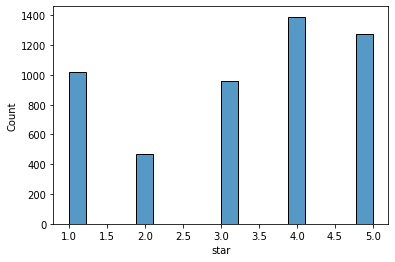

In [9]:
sns.histplot(data=data['star']);

## 4. Data cleaning

### Acronym words

In [10]:
acronym_words = []
acronym_words_dict = []
acronym_words = open('data/acronym_word.txt','r', encoding='utf-8')
acronym_words = acronym_words.readlines()
for i in range(len(acronym_words)):
  acronym_words_split = acronym_words[i].split("\t")
  for j in range(len(acronym_words_split)):
    acronym_words_split[j] = re.sub("[\n\ufeff]",'',acronym_words_split[j])
  try:
    acronym_words_dict.append({acronym_words_split[0]:acronym_words_split[1]})
  except: 
    pass

acronym_words_dict[:5]


[{'ship': 'vận chuyển'},
 {'shop': 'cửa hàng'},
 {'m': 'mình'},
 {'mik': 'mình'},
 {'ko': 'không'}]

### Stop words

In [11]:
stop_words = []
stop_words = open('data/stop_word.txt','r', encoding='utf-8')
stop_words = stop_words.readlines()
for i in range(len(stop_words)):
  stop_words[i] = re.sub("[\t\n\ufeff]",'',stop_words[i])

stop_words[:5]

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy']

In [12]:
"""**Tách từ**

"""

# Tách từ
def sementation(text):
  return ViTokenizer.tokenize(text)

In [14]:
"""**Chuẩn hóa**"""

# Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [15]:
# Hàm chuẩn hoá câu
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)
    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip().lower()
    return row

In [16]:
# Xử dụng bộ từ điển để thay thế các kiểu gõ dấu và viết tắt
def replace_acronyms(text):
  text_list = text.split(" ");
  for i in range(len(text_list)):
    for j in range(len(acronym_words_dict)):
      key = list(acronym_words_dict[j].keys())[0]
      value = list(acronym_words_dict[j].values())[0]
      if text_list[i] == key:
        text_list[i] = value
  return " ".join(text_list)


In [17]:
# Xử lý các từ viết trùng lắp
def remove_loop_char(text):
  text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), str(text), flags=re.IGNORECASE)
  text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
  return text

In [18]:
# Loại bỏ stop word
def remove_stop_word(text):
  split_word = text.split(" ");
  words = []
  for word in split_word:
    if word not in stop_words:
      words.append(word)
  return " ".join(words)

### Hàm tổng hợp tiền xử lý dữ liệu

In [19]:
"""**Tiền xử lý dữ liệu**"""
# Làm sạch dữ liệu
def text_prosessing(text):
    # Chuyển đổi thành chữ thường
    text = text.lower() 

    # tách từ
    text = sementation(text)

    #Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
    text = covert_unicode(text)

    # Chuẩn hóa câu
    text = standardize_data(text)

    # Xử dụng bộ từ điển để thay thế các kiểu gõ dấu và viết tắt
    text = replace_acronyms(text)

    # Xử lý các từ viết trùng lắp
    text = remove_loop_char(text)

    # Xử dụng bộ từ điển để thay thế các kiểu gõ dấu và viết tắt
    text = remove_stop_word(text)

    # Xóa các kí tự trong dấu []
    text = re.sub('\[.*?\]', '', text)

    # Xóa các kí tự đặc biệt
    text = re.sub("\W",' ',text) 

    # Xóa các đường link
    text = re.sub('https?://\S+|www\.\S+', ' ', text)

    # Xóa các số
    text = re.sub('\w*\d\w*', '', text)

    # Xóa các đoạn mã html
    text = re.sub(r'<[*>]*>',' ', text)

    #Xóa các kí tự xuống dòng
    text = " ".join(re.sub("\n", " ", text).split())
    return text

### Apply vào dữ liệu của chúng ta

In [20]:
# Apply vào data
data['text'] = data['text'].apply(text_prosessing)

In [21]:
data.head()

,text,star
2,thái_độ dịch_vụ khách_hàng tiki điện_thoại tuầ...,1
3,sản_phẩm tầm giá đx mua pa mẹ yêu_cầu hơi thất...,3
6,sản_phẩm mua giao hàng khui kiểm_tra góc màn_h...,1
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,3
8,đóng_gói cẩn_thận giao sản_phẩm thắc_mắc điện_...,4


## 5. Build Model

In [22]:
len(data[data['star'] < 4])

2451

In [23]:
len(data[data['star'] >= 4])

2664

### Gộp 3 đánh giá 1 2 3 sao là đánh giá tiêu cực với nhãn là 0, 2 đánh giá 4 5 sao là tích cực với nhãn là 1

In [24]:
data["star"] = data["star"].map({1:0, 2:0, 3:0, 4:1, 5:1})

### Our current data (Dữ liệu hiện tại của chúng ta sẽ trong như sau)

In [25]:
data.head(5)

,text,star
2,thái_độ dịch_vụ khách_hàng tiki điện_thoại tuầ...,0
3,sản_phẩm tầm giá đx mua pa mẹ yêu_cầu hơi thất...,0
6,sản_phẩm mua giao hàng khui kiểm_tra góc màn_h...,0
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,0
8,đóng_gói cẩn_thận giao sản_phẩm thắc_mắc điện_...,1


In [26]:
np.array(data['text'])[:2]

array(['thái_độ dịch_vụ khách_hàng tiki điện_thoại tuần hàng đầu trễ lịch hẹn giao tiki gửi thông_báo xin_lỗi hẹn giao làm_việc kiên_nhẫn đợi làm_việc tiki giao hàng mà_lại âm_thầm_hủy_đơn hề điện_thoại thông_báo xin_lỗi gọi tổng_đài trúng chăm sóc hàng thái_độ tệ giọng buồn_ngủ nói_chuyện khách_hàng hoàn_cảnh giao hàng giải_thích lý_do vì_sao hủy_đơn ý_kiến làm_khách nguôi giận dễ_tính mã bù giá điện_thoại đầu mua tặng mã chờ cuối_cùng cầm điện_thoại thất_vọng thái_độ phục_vụ tiki khách_hàng trung_thành tiki bao thái_độ dịch_vụ khách_hàng tệ mua ưu_tiên tiki để_tâm điện_thoại mua lớn_tuổi sử_dụng phù_hợp nhu_cầu',
       'sản_phẩm tầm giá đx mua pa mẹ yêu_cầu hơi thất_vọng nhạc vẻ hơi tệ phụ_kiện sạc tai_nghe sản phẩm khuyến_mãi ít_nhất tặng oF lưng kèm máy mấy sản phẩm hứng_thú thua mấy sản phẩm tầm giá'],
      dtype=object)

In [27]:
X = data['text']
y = data['star']

In [28]:
X.head(3)

2    thái_độ dịch_vụ khách_hàng tiki điện_thoại tuầ...
3    sản_phẩm tầm giá đx mua pa mẹ yêu_cầu hơi thất...
6    sản_phẩm mua giao hàng khui kiểm_tra góc màn_h...
Name: text, dtype: object

In [29]:
y.head()

2    0
3    0
6    0
7    0
8    1
Name: star, dtype: int64

### Sử dụng các giải thuật máy học để huấn luyện mô hình và nghi thức đánh giá K-Fold

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

#### Dùng thư viện Count Vectorizer để vector hóa dữ liệu văn bản 

In [32]:
cv = CountVectorizer()
X_vectors = cv.fit_transform(X)

In [33]:
print(X_vectors.todense().shape)

(5115, 4960)


vector của chúng ta có độ dài 4960

In [34]:
print(len(cv.get_feature_names()))
print(X_vectors.todense().shape)
print(X_vectors.todense()[0].shape)
print(len(X))

4960
(5115, 4960)
(1, 4960)
5115


In [35]:
print(X_vectors)

  (0, 3582)	4
  (0, 999)	2
  (0, 1723)	4
  (0, 3725)	6
  (0, 4678)	5
  (0, 3979)	1
  (0, 1446)	4
  (0, 4802)	2
  (0, 3940)	1
  (0, 2132)	1
  (0, 1543)	2
  (0, 1146)	4
  (0, 1288)	1
  (0, 3606)	2
  (0, 4450)	2
  (0, 2025)	2
  (0, 1794)	1
  (0, 4899)	1
  (0, 2281)	1
  (0, 4613)	1
  (0, 1547)	1
  (0, 1277)	1
  (0, 4153)	1
  (0, 3903)	1
  (0, 502)	1
  :	:
  (5113, 1959)	1
  (5113, 1465)	1
  (5113, 4648)	1
  (5113, 3772)	1
  (5113, 4827)	1
  (5113, 528)	2
  (5113, 2926)	1
  (5113, 4924)	2
  (5113, 575)	3
  (5113, 4959)	1
  (5113, 4000)	1
  (5113, 4393)	1
  (5113, 3554)	2
  (5113, 4553)	1
  (5113, 1752)	1
  (5113, 4905)	1
  (5113, 1470)	2
  (5113, 4459)	1
  (5113, 172)	1
  (5113, 2080)	2
  (5113, 4126)	1
  (5114, 776)	1
  (5114, 1500)	1
  (5114, 3846)	2
  (5114, 2802)	1


In [37]:
print(cv.vocabulary_)

#### Huấn luyện mô hình bằng DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7000879097358121


#### Huấn luyện mô hình bằng KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.6461357937866927


#### Huấn luyện mô hình bằng MultinomialNB

In [43]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7798656127690802


#### Huấn luyện mô hình bằng RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7812347113502935


#### Huấn luyện mô hình bằng SVM

In [45]:
from sklearn.svm import SVC

model = SVC()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7788775837818004


### Kết quả huấn luyện

Lần 1

DecisionTreeClassifier 0.7000879097358121

KNeighborsClassifier 0.6461357937866927

MultinomialNB 0.7798656127690802

RandomForestClassifier 0.7812347113502935

SVC 0.7788775837818004

Giải thuật Ramdom Forest cho kết quả tốt nhất với độ chính xác 78.12%

### Lưu model
Model được lưu lại thành file pickle được sử dụng để viết chương trình dự đoán

In [ ]:
from sklearn.metrics import accuracy_score
import pickle

In [62]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Lưu model
# cv = CountVectorizer()
# X_train_vectors = cv.fit_transform(X_train)

# NB_model = MultinomialNB()
# NB_model.fit(X_train_vectors, y_train)
# pred_y = NB_model.predict(cv.transform(X_test))

# print('Training accuracy: %.4f' % accuracy_score(y_train, NB_model.predict(X_train_vectors)))
# print('Test accuracy: %.4f' % accuracy_score(y_test, pred_y))

# with open("/CountVectorizerAndMultinomialNB.pkl", 'wb') as fout:
#     pickle.dump((cv, NB_model), fout)

### Đọc model
Model phải đọc được trở lại từ file, sử dụng để viết ứng dụng dự đoán

In [46]:
# with open('CountVectorizerAndMultinomialNB.pkl', 'rb') as f:
#     cv, NB_model = pickle.load(f)
# X_vector = cv.transform(X_test)
# y_pred = NB_model.predict(X_vector)
# df = pd.DataFrame({"y test":y_test, "y pred":y_pred})
# print(accuracy_score(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'CountVectorizerAndMultinomialNB.pkl'

In [98]:
# X_vector

<1023x4448 sparse matrix of type '<class 'numpy.int64'>'
	with 10073 stored elements in Compressed Sparse Row format>

### Thử cải thiện mô hình bằng PhoBERT

tham khảo: https://github.com/thangnch/MiAI_Sentiment_Analysis_PhoBert/blob/main/train_model.py

In [ ]:
!pip install underthesea

In [ ]:
from transformers import AutoModel, AutoTokenizer # Thư viện BERT
import torch
import underthesea

In [ ]:
# Hàm load model BERT
def load_bert():
    v_phobert = AutoModel.from_pretrained("vinai/phobert-base")
    v_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
    return v_phobert, v_tokenizer

In [ ]:
# Hàm tạo ra bert features
def make_bert_features(v_text):
    global phobert
    v_tokenized = []
    max_len = 100 # Mỗi câu dài tối đa 100 từ
    for i_text in v_text:
        print("Đang xử lý line = ", i_text)
        # Phân thành từng từ
        line = underthesea.word_tokenize(i_text)
        # Ghép lại thành câu như cũ sau khi lọc
        line = " ".join(line)
        line = underthesea.word_tokenize(line, format="text")
        print("Word segment  = ", line)
        # Tokenize bởi BERT
        line = tokenizer.encode(line)
        v_tokenized.append(line)

    # Chèn thêm số 1 vào cuối câu nếu như không đủ 100 từ
    padded = np.array([i + [1] * (max_len - len(i)) for i in v_tokenized])
#     print('padded:', padded[0])
#     print('len padded:', padded.shape)

    # Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
    attention_mask = np.where(padded == 1, 0, 1)
#     print('attention mask:', attention_mask[0])

    # Chuyển thành tensor
    padded = torch.tensor(padded).to(torch.long)
#     print("Padd = ",padded.size())
    attention_mask = torch.tensor(attention_mask)

    # Lấy features dầu ra từ BERT
    with torch.no_grad():
        last_hidden_states = phobert(input_ids= padded, attention_mask=attention_mask)

    v_features = last_hidden_states[0][:, 0, :].numpy()
    print(v_features.shape)
    return v_features

In [ ]:
print("Chuẩn bị nạp model BERT....")
phobert, tokenizer = load_bert()
print("Đã nạp xong model BERT.")

In [ ]:
print("Chuẩn bị tạo features từ BERT.....")
global phobert
v_tokenized = []
max_len = 80 # Mỗi câu dài tối đa 90 từ
for i_text in X:
#     print("Đang xử lý line = ", i_text)
    # Phân thành từng từ
    line = underthesea.word_tokenize(i_text)
    # Ghép lại thành câu như cũ sau khi lọc
    line = " ".join(line)
    line = underthesea.word_tokenize(line, format="text")
#     print("Word segment  = ", line)
    # Tokenize bởi BERT
    line = tokenizer.encode(line)
    v_tokenized.append(line)

# Chèn thêm số 1 vào cuối câu nếu như không đủ 100 từ
padded = np.array([np.array(i[:max_len-len(i)]) if len(i) > max_len else np.array(i + [1] * (max_len - len(i))) for i in v_tokenized])
print('padded:', padded[0])
print('len padded:', padded.shape)


In [ ]:
# Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
attention_mask = np.where(padded == 1, 0, 1)
print('attention mask:', attention_mask[0])

In [ ]:
# Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
attention_mask = np.where(padded == 1, 0, 1)
print('attention mask:', attention_mask[0].shape)

In [ ]:
# Chuyển thành tensor
padded = torch.tensor(padded).to(torch.long)
print("Padd = ",padded.size())
attention_mask = torch.tensor(attention_mask)

In [ ]:
# Lấy features dầu ra từ BERT
with torch.no_grad():
    last_hidden_states = phobert(input_ids= padded, attention_mask=attention_mask)

v_features = last_hidden_states[0][:, 0, :].numpy()
print(v_features.shape)
print("Đã tạo xong features từ BERT")